In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# load data

data = pd.read_csv('../data/raw/Somerville_Happiness_Survey_Responses.csv')

In [3]:
# data quality check
print("Total responses: {}".format(len(data)))
print("Responses per year: {}".format(data.groupby('Year').count()[['Combined_ID']]))

Total responses: 8886
Responses per year:       Combined_ID
Year             
2011         6167
2013          193
2015          185
2017          845
2019         1496


In [4]:
yr_counts = data.groupby("Year").count()

# 2011 doesn't work because most of the questions are null
# data_2011 = data[data['Year']==2011]

data_2019 = data[data['Year']==2019]

In [5]:
# Note that all columns are either null or non-null
# data_2019.isna().sum()

In [6]:
# drop null columns
data_2019 = data_2019.dropna(axis=1)

# replace any 999.0 with null (declined to answer)
data_2019 = data_2019.replace(999.0, np.nan)
data_2019 = data_2019.replace(999, np.nan)
data_2019 = data_2019.replace('999', np.nan)

data_2019.isna().sum()

col_map = {'Combined_ID': 'id',
           'Year': 'year',
           'How.happy.do.you.feel.right.now': 'q01_happy',
           'How.satisfied.are.you.with.your.life.in.general': 'q02_satisfied_general',
           'How.satisfied.are.you.with.Somerville.as.a.place.to.live': 'q03_satisfied_somerville',
           'How.satisfied.are.you.with.your.neighborhood': 'q04_satisfied_neighborhood',
           'Do.you.feel.the.City.is.headed.in.the.right.direction.or.is.it.on.the.wrong.track': 'q05_city_direction',
           'How.would.you.rate.the.following..The.availability.of.information.about.city.services': 'q06a_city_services',
           'How.would.you.rate.the.following..The.cost.of.housing': 'q06b_cost_housing',
           'How.would.you.rate.the.following..The.overall.quality.of.public.schools': 'q06c_quality_schools',
           'How.would.you.rate.the.following..Your.trust.in.the.local.police': 'q06d_trust_police',
           'How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks': 'q06e_sidewalks',
           'How.would.you.rate.the.following..The.availability.of.social.community.events': 'q06f_events',
           'How.safe.do.you.feel.crossing.a.busy.street.in.Somerville': 'q07_safe_crossing_street',
           'How.convenient.is.it.for.you.to.get.where.you.want.to.go': 'q08_convenient',
           'How.safe.do.you.feel.walking.in.your.neighborhood.at.night': 'q09_safe_at_night',
           'How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood': 'q10_parks',
           'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood': 'q11_beauty',
           'How.satisfied.are.you.with.the.condition.of.your.housing': 'q12_housing_condition',
           'What.is.your.gender': 'd01_gender',
           'Age': 'd02_age',
           'Language': 'd03_language',
          'What.is.your.race.or.ethnicity': 'd04_race',
          'Do.you.have.children.age.18.or.younger.who.live.with.you': 'd05_num_children',
          'Describe.your.housing.status.in.Somerville': 'd06_housing_status',
          'Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years': 'd07_plan_to_move',
          'What.is.your.annual.household.income': 'd08_hhi',
          'Are.you.a.student': 'd09_is_student',
           'How.long.have.you.lived.here': 'd10_how_long_lived_here',
          'Ward': 'ward',
          'Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.yes.why': 'move_why',
          'What.is.your.primary.mode.of.transportation': 'd11_transportation_mode',
          'Which.of.the.following.have.you.used.in.the.past.month.to.get.around': 'd12_transportation_month',
          }

In [7]:
# map column names 
data_2019.columns = data_2019.columns.map(col_map)

In [8]:
data_2019.head()

,id,year,q01_happy,q02_satisfied_general,q03_satisfied_somerville,q04_satisfied_neighborhood,q06a_city_services,q06b_cost_housing,q06c_quality_schools,q06d_trust_police,...,d09_is_student,ward,q05_city_direction,q07_safe_crossing_street,q08_convenient,q12_housing_condition,move_why,d11_transportation_mode,d12_transportation_month,d03_language
7390,7391,2019,10.0,10.0,10.0,10.0,5.0,4.0,4.0,5.0,...,No,4.0,Right direction,6.0,5.0,9.0,NaN,Car,Car,English
7391,7392,2019,7.0,7.0,9.0,8.0,4.0,2.0,NaN,4.0,...,No,6.0,Not sure,9.0,8.0,6.0,NaN,"Walk, Car","Walk, Car",English
7392,7393,2019,9.0,9.0,1.0,1.0,4.0,1.0,4.0,2.0,...,No,7.0,Wrong track,2.0,1.0,9.0,NaN,Car,"Walk, Car",English
7393,7394,2019,10.0,9.0,9.0,8.0,5.0,5.0,5.0,5.0,...,No,3.0,Right direction,5.0,7.0,9.0,Family reasons,Walk,"Walk, Public transit, Car",English
7394,7395,2019,8.0,8.0,7.0,7.0,5.0,3.0,4.0,5.0,...,No,4.0,Not sure,7.0,9.0,8.0,NaN,Car,"Walk, Public transit, Car",Chinese


<AxesSubplot:>

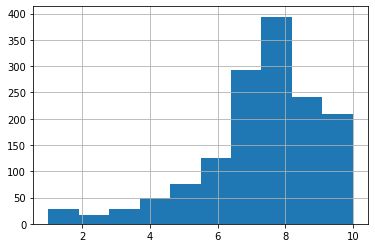

In [9]:
data_2019['q01_happy'].hist()

In [10]:
data_2019.apply(lambda x: len(x.unique())).sort_index()

d01_gender                      15
d02_age                         78
d03_language                    81
d04_race                        40
d05_num_children                 3
d06_housing_status               6
d07_plan_to_move                 3
d08_hhi                          9
d09_is_student                   3
d10_how_long_lived_here        155
d11_transportation_mode         16
d12_transportation_month        15
id                            1496
move_why                       378
q01_happy                       11
q02_satisfied_general           11
q03_satisfied_somerville        11
q04_satisfied_neighborhood      11
q05_city_direction               4
q06a_city_services               6
q06b_cost_housing                6
q06c_quality_schools             6
q06d_trust_police                6
q06e_sidewalks                   6
q06f_events                      6
q07_safe_crossing_street        11
q08_convenient                  11
q09_safe_at_night               11
q10_parks           

In [11]:
def map_gender(v):
    if v not in ('Female', 'Male', 'No Answer'):
        return 'Non-binary'
    else:
        return v
    
def map_age(v):
    if v <= 24:
        return 1
    elif v <= 34:
        return 2
    elif v <= 44:
        return 3
    elif v <= 54:
        return 3
    else:
        return 5

data_2019['d01_gender'] = data_2019['d01_gender'].fillna('No Answer')    
data_2019['d01_gender'] = data_2019['d01_gender'].apply(lambda x: map_gender(x))
# data_2019.groupby('d01_gender').count()

data_2019['d02_age'] = pd.to_numeric(data_2019['d02_age'])
data_2019['d02_age'] = data_2019['d02_age'].apply(lambda x: map_age(x))
data_2019['d02_age'] = data_2019['d02_age'].fillna('No Answer')    


In [12]:
data_2019['d11_car'] = pd.to_numeric(data_2019['d11_transportation_mode'].str.contains('Car') * 1)
data_2019['d11_walk'] = pd.to_numeric(data_2019['d11_transportation_mode'].str.contains('Walk') * 1)
data_2019['d11_bike'] = pd.to_numeric(data_2019['d11_transportation_mode'].str.contains('Bike') * 1)
data_2019['d11_public'] = pd.to_numeric(data_2019['d11_transportation_mode'].str.contains('Public') * 1)

data_2019.drop('d11_transportation_mode', axis=1, inplace=True)

data_2019['d12_car'] = pd.to_numeric(data_2019['d12_transportation_month'].str.contains('Car') * 1)
data_2019['d12_walk'] = pd.to_numeric(data_2019['d12_transportation_month'].str.contains('Walk') * 1)
data_2019['d12_bike'] = pd.to_numeric(data_2019['d12_transportation_month'].str.contains('Bike') * 1)
data_2019['d12_public'] = pd.to_numeric(data_2019['d12_transportation_month'].str.contains('Public') * 1)

data_2019.drop('d12_transportation_month', axis=1, inplace=True)

In [13]:
city_direction_map = {'Right direction': 'right',
                     'Wrong track': 'wrong',
                     'Not sure': 'unsure',}

data_2019['q05_city_direction'] = data_2019['q05_city_direction'].map(city_direction_map)
data_2019['q05_city_direction'].fillna('no_answer', inplace=True)

In [14]:
data_2019['d03_language'] = data_2019['d03_language'].str.lower()

data_2019['d03_english'] = pd.to_numeric(data_2019['d03_language'].str.contains('english') * 1)
data_2019['d03_spanish'] = pd.to_numeric(data_2019['d03_language'].str.contains('spanish') * 1)
data_2019['d03_portuguese'] = pd.to_numeric(data_2019['d03_language'].str.contains('portuguese') * 1)

searchfor = ['mandarin', 'chinese', 'contonese']
data_2019['d03_chinese'] = pd.to_numeric(data_2019['d03_language'].str.contains('|'.join(searchfor)) * 1)

searchfor = ['arabic', 'greek', 'french', 'punjabi', 'amharic', 
             'gujrati', 'nepali', 'tigrinya', 'polish', 'filipino',
             'italian', 'japanese', 'russian', 'haitian creole', 'kreole', 'romanian',
             'slovac', 'vietnnamese', 'esperanto', 'hebrew', 'bulgarian', 'latin',
            'persian', 'romanian']
data_2019['d03_other'] = pd.to_numeric(data_2019['d03_language'].str.contains('|'.join(searchfor)) * 1)

data_2019.drop('d03_language', axis=1, inplace=True)

In [15]:
data_2019['d04_race'] = data_2019['d04_race'].str.lower()

searchfor = ['hispanic', 'puerto rican']
data_2019['d04_eth_hispanic'] = pd.to_numeric(data_2019['d04_race'].str.contains('|'.join(searchfor)) * 1)

data_2019['d04_eth_brazilian'] = pd.to_numeric(data_2019['d04_race'].str.contains('brazilian') * 1)
data_2019['d04_race_white'] = pd.to_numeric(data_2019['d04_race'].str.contains('white') * 1)
data_2019['d04_race_aa'] = pd.to_numeric(data_2019['d04_race'].str.contains('black') * 1)
data_2019['d04_race_asian'] = pd.to_numeric(data_2019['d04_race'].str.contains('asian') * 1)

searchfor = ['jewish', 'american indian', 'portuguese', 'cape verdean', 
             'middle eastern', 'east indian', 'biracial', 'arab', 'brazilian']
data_2019['d04_race_other'] = pd.to_numeric(data_2019['d04_race'].str.contains('|'.join(searchfor)) * 1)

data_2019.drop('d04_race', axis=1, inplace=True)

In [16]:
hhi_map = {'Less than $10,000': 1,
           '$10,000 to $24,999': 2,
           '$25,000 to $49,999': 3,
           '$50,000 to 74,999': 4,
           '$75,000 to $99,999': 5,
           '$100,000 to $149,999': 6,
           '$150,000 to 200,000': 7,
           '$200,000 or more': 8}

data_2019['d08_hhi'] = data_2019['d08_hhi'].map(hhi_map)

In [17]:
data_2019['d10_how_long_lived_here'] = data_2019['d10_how_long_lived_here'].str.replace("999", '-')

In [18]:
data_2019['d10_how_long_lived_here'] = data_2019['d10_how_long_lived_here'].str.lower()
data_2019['d10_how_long_lived_here'] = data_2019['d10_how_long_lived_here'].str.replace("999", '-')
data_2019['d10_how_long_lived_here'].fillna("no_answer", inplace=True)
data_2019['d10_how_long_lived_here'] = data_2019['d10_how_long_lived_here'].apply(lambda x: x[7:] if x.startswith("almost ") else x)
data_2019['d10_how_long_lived_here'] = data_2019['d10_how_long_lived_here'].apply(lambda x: x[7:] if x.startswith("about ") else x)
data_2019['d10_how_long_lived_here'] = data_2019['d10_how_long_lived_here'].apply(lambda x: x[7:] if x.startswith("over ") else x)

In [19]:

def format_years(v):
    

    # just a number, assume it's years
    p = '^([\.\d]+)$'
    r = re.findall(p, v)
    
    if len(r) > 0:
        return int(float(r[0]))
    
    # "3.5 years"
    p = '^([\.\d]+) years$'
    r = re.findall(p, v)
    
    if len(r) > 0:
        return int(float(r[0]))

    # "30+ years"
    p = '^([\.\d]+)\+ years$'
    r = re.findall(p, v)
    
    if len(r) > 0:
        return int(float(r[0]))
    
    # "9 months"
    p = '^([\.\d]+) months$'
    r = re.findall(p, v)
    
    if len(r) > 0:
        return int(float(r[0]) / 12)
    
    # "3 weeks"
    p = '^([\.\d]+) weeks$'
    r = re.findall(p, v)
    
    if len(r) > 0:
        return 0
    
    # "6-8 years"
    p = '^([\.\d]+)-([\.\d]+) years$'
    r = re.findall(p, v)
    
    if len(r) > 0:
        return int(float(r[0][1]))
    
    # "1 year, 9 months"
    p = '^([\.\d]+) year, ([\.\d]+) months$'
    r = re.findall(p, v)
    
    if len(r) > 0:
        return int(float(r[0][0]))
    
    # "3 days"
    p = '^([\.\d]+) days$'
    r = re.findall(p, v)
    
    if len(r) > 0:
        return 0
    
    if v == '1 year':
        return 1
    
    if v == '1 month':
        return 0
    
    years_map = {'no_answer': np.nan,
             '1 month, two years before from 2010-2012': 2,
             '4  months': 0,
             '5 years + 10 years before': 15,
             '`17 years': 17,
             'less than 1 year': 0,
             '11years': 11,
             '3 generations': np.nan,
             '1 year thist ime; 6 years total': 6,
             '1 year 2 months': 1,
             'too long': np.nan,
             '50 +': 50,
             ' years': np.nan,
             '16+': 16,
             '14 years; 11 years now': 14,
             '1 year 3 months': 1,
             'less than 10 months': 0,
             '30+': 30,
             '8.5 yesrs': 8.5,
             'life long resident': 50,
             '1 year this time; 6 years total': 6
            }
    
    if v in years_map.keys():
        return years_map[v]
    
    else:
        print(v)


In [20]:
data_2019['d10_how_long_lived_here'] = data_2019['d10_how_long_lived_here'].apply(lambda x: format_years(x))
data_2019['d10_bins'] = pd.qcut(data_2019['d10_how_long_lived_here'], q=4, labels=np.arange(4))
data_2019.drop('d10_how_long_lived_here', axis=1, inplace=True)

In [21]:
data_2019['d10_bins'] = pd.to_numeric(data_2019['d10_bins'])

In [22]:
data_2019['d06_housing_status'].unique()

def format_housing_status(v):
    if v == 'Rent':
        return v
    
    elif v == 'Own':
        return v
    
    else:
        return 'Other'

In [23]:
data_2019['d06_housing_status'] = data_2019['d06_housing_status'].apply(lambda x: format_housing_status(x))

In [24]:
data_2019['d05_num_children'] = pd.to_numeric(data_2019['d05_num_children'].map({'Yes': 1, 'No': 0}))
data_2019['d07_plan_to_move'] = pd.to_numeric(data_2019['d07_plan_to_move'].map({'Yes': 1, 'No': 0}))
data_2019['d09_is_student'] = pd.to_numeric(data_2019['d09_is_student'].map({'Yes': 1, 'No': 0}))

In [25]:
one_hot_cols = ['d01_gender', 'd06_housing_status', 'q05_city_direction']
data_2019 = pd.get_dummies(data_2019, columns=one_hot_cols)

In [27]:
data_2019.drop('year', axis=1, inplace=True)
data_2019.drop('move_why', axis=1, inplace=True)

In [28]:
data_2019.corr()

,id,q01_happy,q02_satisfied_general,q03_satisfied_somerville,q04_satisfied_neighborhood,q06a_city_services,q06b_cost_housing,q06c_quality_schools,q06d_trust_police,q06e_sidewalks,...,d01_gender_Male,d01_gender_No Answer,d01_gender_Non-binary,d06_housing_status_Other,d06_housing_status_Own,d06_housing_status_Rent,q05_city_direction_no_answer,q05_city_direction_right,q05_city_direction_unsure,q05_city_direction_wrong
id,1.000000,0.006422,0.008343,0.026983,0.006436,0.018305,-0.012398,-0.007221,-0.038344,-0.003737,...,-0.019288,-0.004413,0.027602,0.020188,-0.035466,0.027363,0.020521,-0.008587,-0.004228,0.007956
q01_happy,0.006422,1.000000,0.708327,0.515344,0.463294,0.228814,0.229444,0.256248,0.245962,0.160525,...,-0.013058,-0.020465,0.000801,-0.037197,0.075014,-0.061183,0.041622,0.258567,-0.092614,-0.267064
q02_satisfied_general,0.008343,0.708327,1.000000,0.381716,0.374205,0.212443,0.228282,0.228375,0.238225,0.132217,...,0.014875,-0.053761,0.011884,-0.063752,0.146411,-0.122867,0.017193,0.199565,-0.072850,-0.198933
q03_satisfied_somerville,0.026983,0.515344,0.381716,1.000000,0.721919,0.367238,0.282073,0.358343,0.241809,0.326972,...,-0.016814,-0.083060,0.024135,-0.038523,0.044142,-0.029912,0.039229,0.421217,-0.037875,-0.573410
q04_satisfied_neighborhood,0.006436,0.463294,0.374205,0.721919,1.000000,0.340848,0.163010,0.330306,0.221126,0.307580,...,-0.013497,-0.057226,0.009628,-0.007181,-0.022524,0.025091,0.047875,0.299182,-0.030737,-0.410301
q06a_city_services,0.018305,0.228814,0.212443,0.367238,0.340848,1.000000,0.227367,0.365564,0.311668,0.314036,...,0.015983,-0.058262,0.027787,-0.019849,0.091115,-0.083597,0.001947,0.264327,-0.063016,-0.298524
q06b_cost_housing,-0.012398,0.229444,0.228282,0.282073,0.163010,0.227367,1.000000,0.248820,0.270418,0.194963,...,0.045774,-0.018778,-0.028287,0.021106,0.193277,-0.200305,-0.000498,0.265567,-0.096164,-0.255612
q06c_quality_schools,-0.007221,0.256248,0.228375,0.358343,0.330306,0.365564,0.248820,1.000000,0.379013,0.340318,...,0.031894,-0.069560,-0.046698,0.013725,-0.053395,0.048582,0.018196,0.203000,-0.064978,-0.208062
q06d_trust_police,-0.038344,0.245962,0.238225,0.241809,0.221126,0.311668,0.270418,0.379013,1.000000,0.315071,...,0.051383,-0.044622,-0.112140,0.017779,0.066430,-0.072832,-0.008626,0.159684,-0.049190,-0.160937
q06e_sidewalks,-0.003737,0.160525,0.132217,0.326972,0.307580,0.314036,0.194963,0.340318,0.315071,1.000000,...,0.000693,-0.037931,-0.042952,0.003875,-0.092609,0.090984,0.032750,0.195902,-0.065151,-0.209966


In [29]:
data_2019.to_csv('../data/processed/data_2019_preprocessed.csv', index=False)